In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
tfd = tf.contrib.distributions

In [3]:
def make_encoder(data, code_size):
    x = tf.layers.flatten(data)
    x = tf.layers.dense(x, 200, tf.nn.relu)
    x = tf.layers.dense(x, 200, tf.nn.relu)
    loc = tf.layers.dense(x, code_size)
    scale = tf.layers.dense(x, code_size, tf.nn.softplus)
    return tfd.MultivariateNormalDiag(loc, scale)


def make_prior(code_size):
    loc = tf.zeros(code_size)
    scale = tf.ones(code_size)
    return tfd.MultivariateNormalDiag(loc, scale)


def make_decoder(code, data_shape):
    x = code
    x = tf.layers.dense(x, 200, tf.nn.relu)
    x = tf.layers.dense(x, 200, tf.nn.relu)
    logit = tf.layers.dense(x, np.prod(data_shape))
    logit = tf.reshape(logit, [-1] + data_shape)
    return tfd.Independent(tfd.Bernoulli(logit), 2)


def plot_codes(ax, codes, labels):
    ax.scatter(codes[:, 0], codes[:, 1], s=50, c=labels, alpha=0.9)#,cmap='Blues', )
    ax.set_aspect('equal')
    ax.set_xlim(codes.min() - .1, codes.max() + .1)
    ax.set_ylim(codes.min() - .1, codes.max() + .1)
    ax.tick_params(
        axis='both', which='both', left='off', bottom='off',
        labelleft='off', labelbottom='off')


def plot_samples(ax, samples):
    for index, sample in enumerate(samples):
        ax[index].imshow(sample, cmap='gray')
        ax[index].axis('off')

In [4]:
data = tf.placeholder(tf.float32, [None, 28, 28])

make_encoder = tf.make_template('encoder', make_encoder)
make_decoder = tf.make_template('decoder', make_decoder)

# Define the model.
prior = make_prior(code_size=2)
posterior = make_encoder(data, code_size=2)
code = posterior.sample()

# Define the loss.
likelihood = make_decoder(code, [28, 28]).log_prob(data)
divergence = tfd.kl_divergence(posterior, prior)
elbo = tf.reduce_mean(likelihood - divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-elbo)

samples = make_decoder(prior.sample(10), [28, 28]).mean()

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updatin

In [5]:
mnist = input_data.read_data_sets('MNIST_data/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
images_1 = []
labels_1 = []
images_6 = []
labels_6 = []
images_9 = []
labels_9 = []

for l, img in zip(mnist.test.labels, mnist.test.images):
    if l == 1:
        images_1.append(img)
        labels_1.append(l)
    elif l == 6:
        images_6.append(img)
        labels_6.append(l)
    elif l == 9:
        images_9.append(img)
        labels_9.append(l)

        
#mnist.test.labels[:10]
#mnist.test.images
print(len(images_1))
print(len(images_6))
print(len(images_9))

1135
958
1009


In [7]:
images = images_1 +  images_6[:5] +  images_9[:5]
labels = labels_1 +  labels_6[:5] +  labels_9[:5]

In [8]:
images = np.array(images).reshape([-1, 28, 28])
labels = np.array(labels)

In [9]:
images.shape

(1145, 28, 28)

In [10]:
labels.shape

(1145,)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch 0 elbo -543.9631
Epoch 1 elbo -61.982906
Epoch 2 elbo -57.38031
Epoch 3 elbo -57.593475
Epoch 4 elbo -56.533756
Epoch 5 elbo -56.282806
Epoch 6 elbo -56.484554
Epoch 7 elbo -56.14859
Epoch 8 elbo -55.71167
Epoch 9 elbo -55.755554
Epoch 10 elbo -55.65012
Epoch 11 elbo -55.69638
Epoch 12 elbo -55.719074
Epoch 13 elbo -55.42938
Epoch 14 elbo -55.45096
Epoch 15 elbo -55.319138
Epoch 16 elbo -55.344242
Epoch 17 elbo -55.429012
Epoch 18 elbo -55.27914
Epoch 19 elbo -55.177296


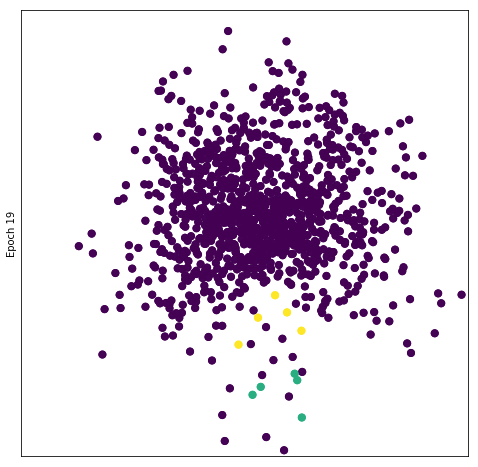

In [11]:
n_iter = 20
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
#fig, ax = plt.subplots(nrows=20, ncols=11, figsize=(10, 20))
with tf.train.MonitoredSession() as sess:
    for epoch in range(n_iter):
        #feed = {data: mnist.test.images.reshape([-1, 28, 28])}
        feed = {data: images}
        test_elbo, test_codes, test_samples = sess.run([elbo, code, samples], feed)
        #print( test_codes[0])
        print('Epoch', epoch, 'elbo', test_elbo)
        if epoch == n_iter -1: 
            ax.set_ylabel('Epoch {}'.format(epoch))
            #ax[epoch, 0].set_ylabel('Epoch {}'.format(epoch))
       
            plot_codes(ax, test_codes,  labels)#mnist.test.labels)
            plot_codes(ax, test_codes,  labels)#mnist.test.labels)
            #plot_samples(ax[epoch, 1:], test_samples)
        for _ in range(1000):
            t = mnist.train.next_batch(100)
            batch = []
            for l,img in zip(t[1],t[0]):
                if l == 1:
                    batch.append(img)
            batch = np.array(batch).reshape([-1, 28, 28])
            #print(batch.shape)
            if len(batch) > 0:
                feed = {data: batch}
                #feed = {data: mnist.train.next_batch(100)[0].reshape([-1, 28, 28])}
                sess.run(optimize, feed)
    plt.savefig('vae-mnist.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()